In [1]:
%pip install matplotlib seaborn pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/coupons.csv')
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
df['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [6]:
#data cleaning - replacing 'less1' with 'never' in Bar and CoffeeHouse columns
df[['Bar','CoffeeHouse']] = df[['Bar', 'CoffeeHouse']].replace({'less1': 'never'})
df['CoffeeHouse'].value_counts()
#df['Bar'].value_counts()

CoffeeHouse
never    6347
1~3      3225
4~8      1784
gt8      1111
Name: count, dtype: int64

In [7]:
# data dressing up - age is an object, convert it to int by creating a mapping of age groups to representative ages
#df['age'].value_counts()
age_mapping = {'below21': 18, '21': 21, '26': 26, '31': 31, '36': 36, '41': 41, '46': 46, '50plus': 50}
df['age'] = df['age'].map(age_mapping)
df['age'].value_counts()

age
21    2653
26    2559
31    2039
50    1788
36    1319
41    1093
46     686
18     547
Name: count, dtype: int64

In [8]:
# Remove the missing data. Car column has too many missing values.
#df['car'].value_counts()
df_clean = df.drop(columns=['car'])
df_clean

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [9]:
# There are some more columns with missing values. Following are the missing values in each column.
df_clean.isnull().sum()
# remove the rows with missing values
df_clean = df_clean.dropna()
# check if there are any missing values
df_clean.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [10]:
# check what % of people accepted the coupon
accepted_coupon_pct = df_clean['Y'].value_counts(normalize=True)*100.
print('{} % of people accepted the coupon.'.format(round(accepted_coupon_pct[1], 2)))


56.93 % of people accepted the coupon.


In [11]:
#sns.countplot(data=df2, x='coupon', hue='Y')

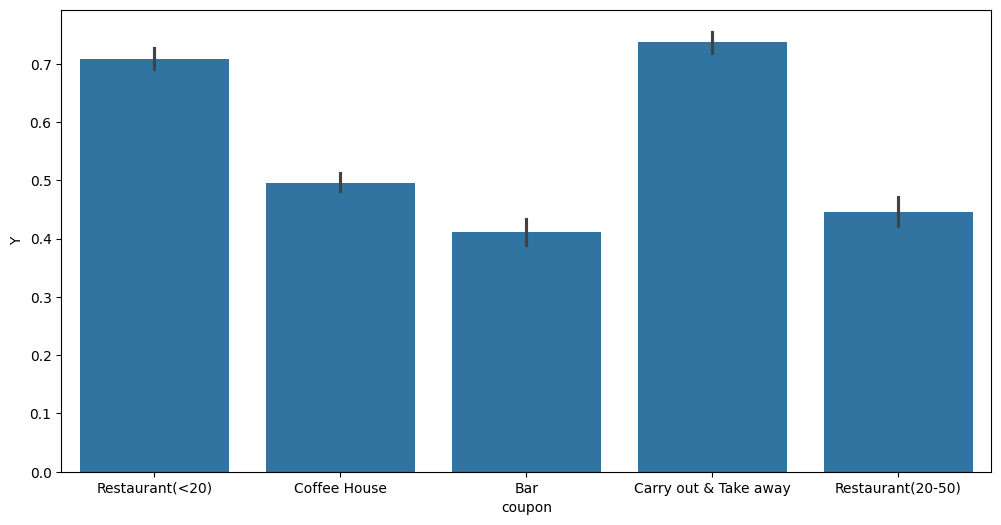

In [12]:
# Using a bar plot to visualize the coupon column to understand the distribution of different coupon types.

plt.figure(figsize=(12,6))
sns.barplot(data=df_clean, x='coupon', y='Y')
plt.show()




In [13]:
df_clean['temperature'].value_counts()

temperature
80    6222
55    3662
30    2195
Name: count, dtype: int64

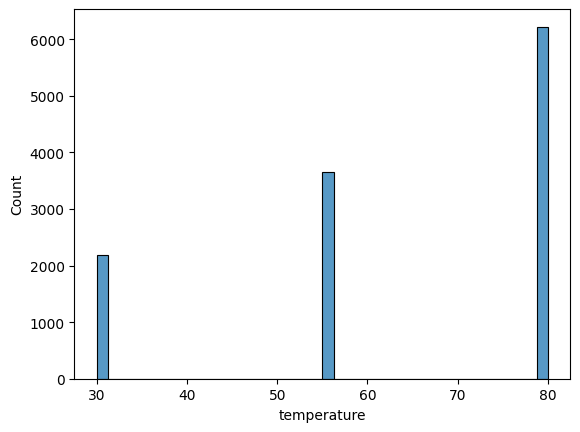

In [14]:
# using the histogram to visualize the temperature column
sns.histplot(data=df_clean, x='temperature', bins=40)
plt.show()

# Analysis - There are only three temperature categories. Most of the data points are in mid or hot category.

Investigating the bar coupons 

In [15]:
# Create a data frame that just contains the bar coupons
df_bar = df_clean[df_clean['coupon'] == 'Bar']
df_bar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   int64 
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null   obj

2. What proportion of bar coupons were accepted?

In [16]:
# exploring the coupon acceptance rate for bar coupons
bar_coupon_accepted = df_bar['Y'].value_counts(normalize=True)*100
#print(bar_coupon_accepted)
print('{} % of people accepted the bar coupon.'.format(round(bar_coupon_accepted[1], 2)))

41.19 % of people accepted the bar coupon.


In [17]:
# Find the Bar goer categories
df_bar['Bar'].value_counts()

Bar
never    1341
1~3       379
4~8       147
gt8        46
Name: count, dtype: int64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [18]:
# categorize the bar goers into infrequent and frequent bar goers
df_bar_for_infrequent_Bar_goers = df_bar[(df_bar['Bar'] == 'never') | (df_bar['Bar'] == '1~3')]
df_bar_for_frequent_Bar_goers = df_bar[(df_bar['Bar'] == '4~8') | (df_bar['Bar'] == 'gt8')]

In [19]:
# calculate the bar coupon acceptance rate for infrequent and frequent bar goers
coupon_accepted_infrequent_Bar_goers = df_bar_for_infrequent_Bar_goers['Y'].value_counts(normalize=True)*100
print('Infrequent Bar goers: {} % of people accepted the bar coupon.'.format(round(coupon_accepted_infrequent_Bar_goers[1], 2)))

coupon_accepted_frequent_Bar_goers = df_bar_for_frequent_Bar_goers['Y'].value_counts(normalize=True)*100
print('Frequent Bar goers: {} % of people accepted the bar coupon.'.format(round(coupon_accepted_frequent_Bar_goers[1], 2)))

# Conclusion: Frequent bar goers are more likely to accept the bar coupons compared to infrequent bar goers.

Infrequent Bar goers: 37.27 % of people accepted the bar coupon.
Frequent Bar goers: 76.17 % of people accepted the bar coupon.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [20]:
# Get a datafram for drivers who go to bar more than once a month and are over age of 25
df_bar_goers_over_25 = df_bar[(df_bar['Bar'] != 'never') & (df_bar['age'] > 25)]
bar_coupon_accepted_over_25 = df_bar_goers_over_25['Y'].value_counts(normalize=True)*100
print('Bar goers over 25: {} % of people accepted the bar coupon.'.format(round(bar_coupon_accepted_over_25[1], 2)))

#Conclusion: Bar goers over the age of 25 are more likely to accept the bar coupons. But they are not significantly more likely than the overall frequent bar goers group.

Bar goers over 25: 68.98 % of people accepted the bar coupon.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [21]:
#df_bar['passanger'].value_counts()
df_bar['occupation'].value_counts()

occupation
Unemployed                                   292
Student                                      237
Computer & Mathematical                      225
Sales & Related                              175
Education&Training&Library                   125
Management                                   108
Office & Administrative Support              101
Arts Design Entertainment Sports & Media      88
Business & Financial                          82
Retired                                       71
Healthcare Support                            44
Food Preparation & Serving Related            43
Community & Social Services                   40
Healthcare Practitioners & Technical          36
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Protective Service                            27
Personal Care & Service                       25
Construction & Extraction                     24
Life Phys

In [22]:
df_bar_multiple_conditions = df_bar[(df_bar['Bar'] != 'never') & (df_bar['passanger'] != 'Kid(s)') & (df_bar['occupation'] != 'Farming Fishing & Forestry')]
#df_bar_multiple_conditions[['passanger', 'Bar', 'occupation']].head(100)
accepted_coupon_pct = df_bar_multiple_conditions['Y'].value_counts(normalize=True)*100
print('{} % of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or Forestry accepted the coupon'.format(round(accepted_coupon_pct[1],2)))

70.94 % of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or Forestry accepted the coupon


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

In [23]:
#df_bar['maritalStatus'].value_counts()
#df_bar['RestaurantLessThan20'].value_counts()
df_bar['income'].value_counts()

income
$25000 - $37499     300
$100000 or More     282
$12500 - $24999     271
$50000 - $62499     249
$37500 - $49999     247
Less than $12500    159
$75000 - $87499     143
$87500 - $99999     133
$62500 - $74999     129
Name: count, dtype: int64

In [24]:
# create a datafram with the 3 categories 
# Category 1 - go to bars more than once a month, had passengers that were not a kid, and were not widowed
df_bar_multi_cond1 = df_bar[(df_bar['Bar'] != 'never') & (df_bar['passanger'] != 'Kid(s)') & (df_bar['maritalStatus'] != 'Widowed')]
# Category 2 - go to bars more than once a month and are under the age of 30
df_bar_multi_cond2 = df_bar[(df_bar['Bar'] != 'never') & (df_bar['age']<30)]
# Category 3 - go to cheap restaurants more than 4 times a month and income is less than 50K
df_bar_multi_cond3 = df_bar[(df_bar['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & \
                            (df_bar['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))]

accepted_coupon_pct1 = round(df_bar_multi_cond1['Y'].value_counts(normalize=True)[1]*100,2)    
accepted_coupon_pct2 = round(df_bar_multi_cond2['Y'].value_counts(normalize=True)[1]*100,2)                             
accepted_coupon_pct3 = round(df_bar_multi_cond3['Y'].value_counts(normalize=True)[1]*100,2)   

print('For the three categories of drivers the coupon acceptance rates are, \
      Category1 - {}%, Category2 - {}%, Category3 - {}%'.format(accepted_coupon_pct1, accepted_coupon_pct2, accepted_coupon_pct3))

# Conclusion1 - Drivers dining at cheap restaurents and income less than 50K are expected to not accept the bar coupon about half of the time
# Conclusion2 - 

For the three categories of drivers the coupon acceptance rates are,       Category1 - 70.94%, Category2 - 71.95%, Category3 - 45.65%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [25]:
# Based on the above observations we can draw the following conclusions.
#1. Drivers who went to bar 4 times or more per month had a high chance (77%) of accepting the bar coupon regardless of other factors
#2. Bar goers (at least once a month) over the age of 25 are more likely to accept the bar coupons (68%). But they are not more likely than the overall frequent bar goers group.
#3. A significant number (70.94 %) of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or Forestry accepted the coupon
#4. Drivers dining at cheap restaurents and income less than 50K are expected to not accept the bar coupon about half of the time


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons

1. Investigate the Restaurent(<20) coupon acceptance rate

In [26]:
# Create a data frame that just contains the Restaurant(<20) coupons
df_rest = df_clean[df_clean['coupon'] == 'Restaurant(<20)']
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2653 entries, 22 to 12678
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2653 non-null   object
 1   passanger             2653 non-null   object
 2   weather               2653 non-null   object
 3   temperature           2653 non-null   int64 
 4   time                  2653 non-null   object
 5   coupon                2653 non-null   object
 6   expiration            2653 non-null   object
 7   gender                2653 non-null   object
 8   age                   2653 non-null   int64 
 9   maritalStatus         2653 non-null   object
 10  has_children          2653 non-null   int64 
 11  education             2653 non-null   object
 12  occupation            2653 non-null   object
 13  income                2653 non-null   object
 14  Bar                   2653 non-null   object
 15  CoffeeHouse           2653 non-null   obj

In [27]:
df_rest['education'].value_counts()

education
Some college - no degree                  936
Bachelors degree                          882
Graduate degree (Masters or Doctorate)    411
Associates degree                         220
High School Graduate                      186
Some High School                           18
Name: count, dtype: int64

### Compare different type of drivers
1. Male vs Female drivers
2. Are unemployed or student by occupation and they are going with a friend
3. If the weather is Sunny vs Rainy or Snowy



<Axes: xlabel='gender', ylabel='Y'>

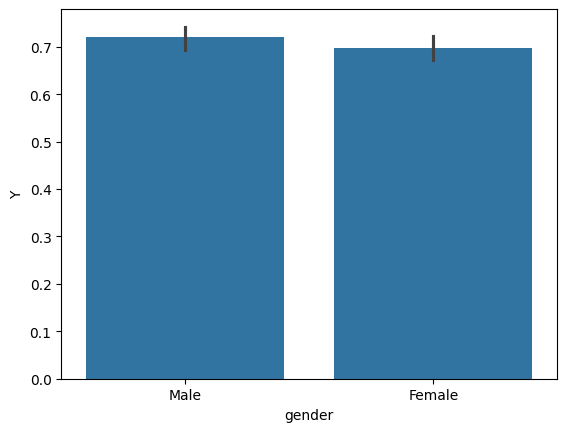

In [28]:
# Restaurant(<20) acceptance rate for Male vs Female drivers
sns.barplot(data=df_rest, x='gender', y='Y')

# Conclusion - The gender doesn't play much role in acceptance rate of Restaurant(<20) coupon with females being ever so slightly lower in accepting the coupon

In [44]:
#df_rest['occupation'].value_counts()
#sns.barplot(data=df_rest, x='occupation', y='Y')
df_rest['passanger'].value_counts()

passanger
Alone        1370
Friend(s)     789
Kid(s)        249
Partner       245
Name: count, dtype: int64

In [60]:
#df_rest['occupation'].value_counts()
df_student_or_unemployed = df_rest[df_rest['occupation'].isin(['Unemployed', 'Student']) & (df_rest['passanger'] == 'Friend(s)')]
acceptance_pct = round(df_student_or_unemployed['Y'].value_counts(normalize=True)[1]*100,2)
print('{}% of drivers who are unemployed or student accept the cheap restaurant coupon while they were going with a friend'.format(acceptance_pct))

79.13% of drivers who are unemployed or student accept the cheap restaurant coupon while they were going with a friend


In [58]:
df_temp = df_rest[ (df_rest['destination']=='Work')]
#df_rest['destination'].value_counts()

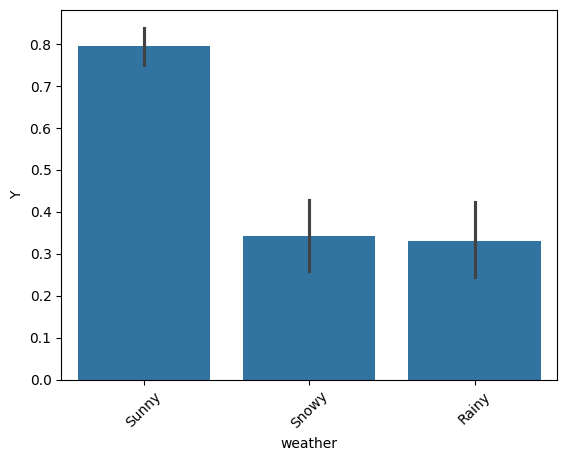

In [59]:

sns.barplot(data=df_temp, x='weather', y='Y')
plt.xticks(rotation=45)
plt.show()

# Conclusion - From the barplot it is evident that there is a high chance of coupon acceptance (80%) when the weather is Sunny vs when it is Rainy or Snowy'